In [2]:
# Import the required libraries
import pandas as pd
from pathlib import Path
import hvplot.pandas
import os
import numpy as np
import seaborn as sns
%matplotlib inline
import yfinance as yf

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
#Read the CSV file containing economic time series data and slide data from '2019-01-01' to '2024-01-01'
start_date = '2019-01-01'
end_date = '2024-01-01'
inflation_forward_5_year_data = pd.read_csv('./Resources/5-year-forward-inflation-rate.csv')
inflation_forward_5_year_data=inflation_forward_5_year_data[(inflation_forward_5_year_data['date']<end_date)& (inflation_forward_5_year_data['date']>=start_date)]
inflation_forward_5_year_data.set_index('date',inplace=True)
inflation_forward_5_year_data.index=pd.to_datetime(inflation_forward_5_year_data.index)

treasury_bond_rate_10_year_yield = pd.read_csv('./Resources/10-year-treasury-bond-rate-yield.csv')
treasury_bond_rate_10_year_yield=treasury_bond_rate_10_year_yield[(treasury_bond_rate_10_year_yield['date']<end_date)& (treasury_bond_rate_10_year_yield['date']>=start_date)]
treasury_bond_rate_10_year_yield.set_index('date',inplace=True)
treasury_bond_rate_10_year_yield.index=pd.to_datetime(treasury_bond_rate_10_year_yield.index)

fed_funds_rate = pd.read_csv('./Resources/fed-funds-rate-historical.csv')
fed_funds_rate=fed_funds_rate[(fed_funds_rate['date']<end_date)& (fed_funds_rate['date']>=start_date)]
fed_funds_rate.set_index('date',inplace=True)
fed_funds_rate.index=pd.to_datetime(fed_funds_rate.index)

fixed_mortgage_30_year_rate = pd.read_csv('./Resources/30-year-fixed-mortgage-rate.csv')
fixed_mortgage_30_year_rate=fixed_mortgage_30_year_rate[(fixed_mortgage_30_year_rate['date']<end_date)& (fixed_mortgage_30_year_rate['date']>=start_date)]
fixed_mortgage_30_year_rate.set_index('date',inplace=True)
fixed_mortgage_30_year_rate.index=pd.to_datetime(fixed_mortgage_30_year_rate.index)

CPI = pd.read_csv('./Resources/Consumer_Price_Index_for_All_Urban.csv', delimiter=',')
CPI.rename(columns={'DATE':'date'},inplace=True)
CPI =CPI[(CPI['date']<end_date)& (CPI['date']>=start_date)]
CPI.set_index('date',inplace=True)
CPI.index=pd.to_datetime(CPI.index)

us_unemployment_rate = pd.read_csv('./Resources/us-national-unemployment-rate.csv')
us_unemployment_rate=us_unemployment_rate[(us_unemployment_rate['date']<end_date)& (us_unemployment_rate['date']>=start_date)]
us_unemployment_rate.set_index('date',inplace=True)
us_unemployment_rate.index=pd.to_datetime(us_unemployment_rate.index)

# Concat daily interest and inflation data
interest_inflation_portfolio = pd.concat([treasury_bond_rate_10_year_yield, fed_funds_rate, inflation_forward_5_year_data],axis=1, join='inner')
interest_inflation_portfolio.columns=['Treasury_10_year','Fed_funds','Inflation']
display(interest_inflation_portfolio)

# Concat monthly mortgage interest, cpi and unemployment rate data
mortgage_cpi_unemployment_portfolio = pd.concat([fixed_mortgage_30_year_rate, CPI, us_unemployment_rate],axis=1, join='inner')
mortgage_cpi_unemployment_portfolio.columns=['Mortgage_rate','CPI','us_unemployment_rate']
display(mortgage_cpi_unemployment_portfolio)


,Treasury_10_year,Fed_funds,Inflation
date,,,
2019-01-02,2.66,2.40,1.91
2019-01-03,2.56,2.40,1.87
2019-01-04,2.67,2.40,1.94
2019-01-07,2.70,2.40,1.95
2019-01-08,2.73,2.40,1.98
...,...,...,...
2023-12-22,3.90,5.33,2.22
2023-12-26,3.89,5.33,2.19
2023-12-27,3.79,5.33,2.18


,Mortgage_rate,CPI,us_unemployment_rate
date,,,
2019-01-01,4.46,252.718,4.0
2019-02-01,4.35,253.322,3.8
2019-03-01,4.06,254.202,3.8
2019-04-01,4.20,255.211,3.6
2019-05-01,3.99,255.290,3.6
2019-06-01,3.73,255.159,3.6
2019-07-01,3.75,255.685,3.7
2019-08-01,3.58,256.059,3.7
2019-09-01,3.64,256.511,3.5


In [4]:
#Q1: How does the 10 Year treasury bond and Fed Funds interest rate with 5 year forward 
#inflation rate behave during 2019-2023? Are they correlated with each other?

In [4]:
#Get the basic statistic information from interest rates and inflation forward rates
interest_inflation_portfolio.describe()

,Treasury_10_year,Fed_funds,Inflation
count,1251.000000,1251.000000,1251.000000
mean,2.275092,1.860176,2.059760
std,1.177512,1.902381,0.285281
min,0.520000,0.040000,0.860000
25%,1.425000,0.090000,1.845000
50%,1.900000,1.550000,2.120000
75%,3.400000,3.080000,2.280000
max,4.980000,5.330000,2.670000


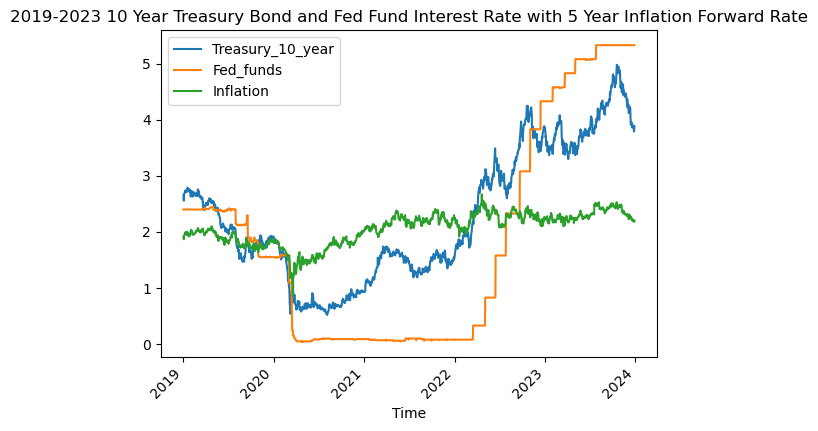

In [6]:
#Plot interest rates and inflation forward rates behavior within time line
ax=interest_inflation_portfolio.plot(
    rot=45,
    xlabel='Time',
    title='2019-2023 10 Year Treasury Bond and Fed Fund Interest Rate with 5 Year Inflation Forward Rate'
)
fig1 = ax.get_figure()
fig1.savefig("./Figures/rates_inflattion_plot.png")

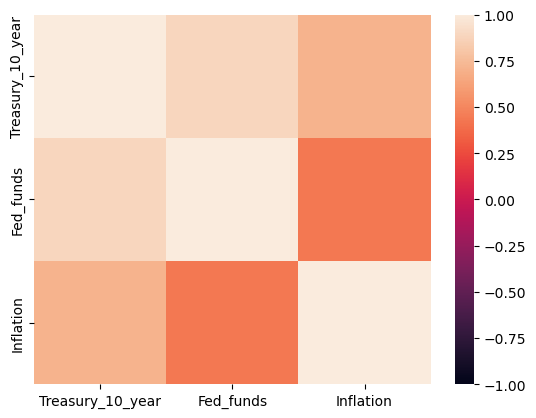

In [7]:
#Calculate the correlation between rates and inflation forward rate
intrate_correlation = interest_inflation_portfolio.corr()
h1=sns.heatmap(intrate_correlation, vmin=-1, vmax=1)
fig2 = h1.get_figure()
fig2.savefig("./Figures/rates_inflattion_heatmap.png")

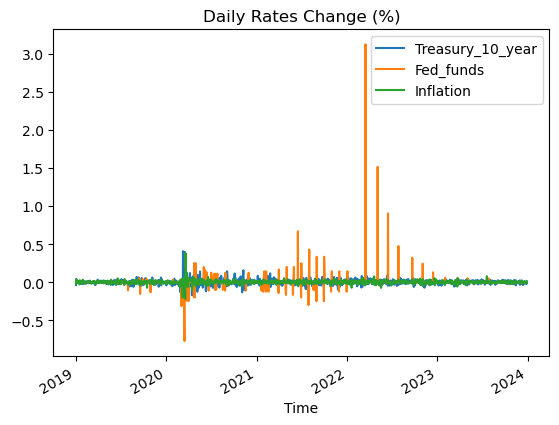

In [13]:
#Calculate and Plot the daily rates change
interest_rate_chg=interest_inflation_portfolio.pct_change()
ax2=interest_rate_chg.plot(
    xlabel='Time',
    title='Daily Rates Change (%)'
)
fig3 = ax2.get_figure()
fig3.savefig("./Figures/daily_rates_change_plot.png")

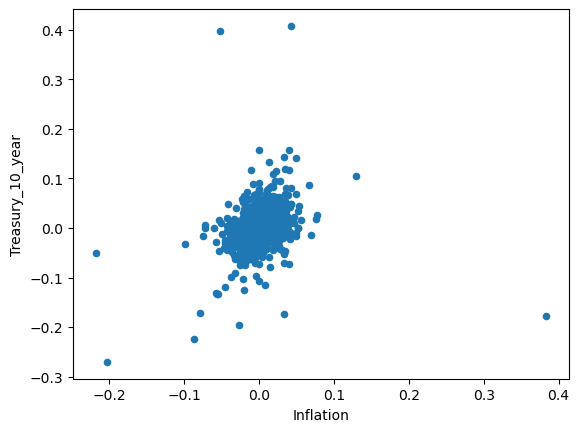

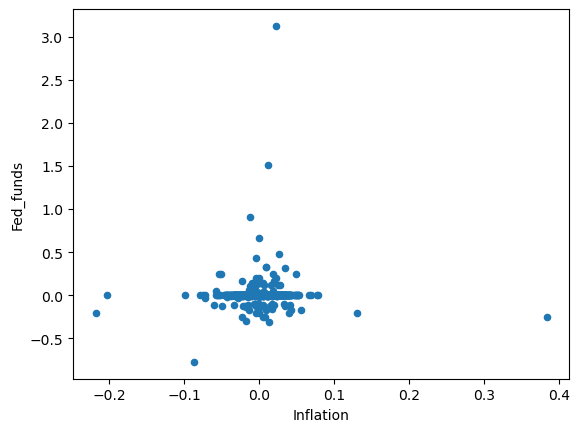

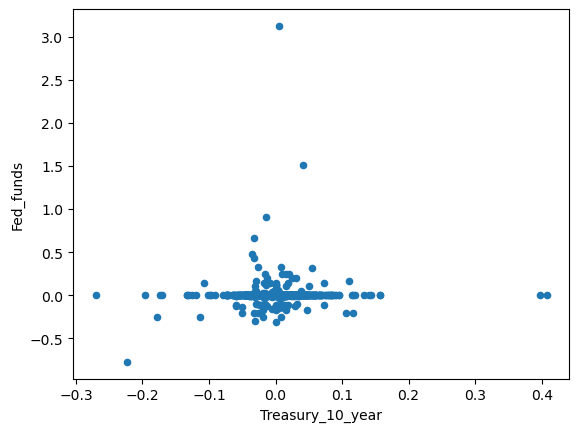

In [9]:
#Plot the relationship between interest rates and inflation forward rate change
rx1=interest_rate_chg.plot(kind='scatter', x='Inflation', y='Treasury_10_year')
rx2=interest_rate_chg.plot(kind='scatter', x='Inflation', y='Fed_funds')
rx3=interest_rate_chg.plot(kind='scatter', x='Treasury_10_year', y='Fed_funds')
fig4 = rx1.get_figure()
fig5 = rx2.get_figure()
fig6 = rx3.get_figure()
fig4.savefig("./Figures/treasury_inflation_plot.png")
fig5.savefig("./Figures/fed_inflation_plot.png")
fig6.savefig("./Figures/fed_treasury_plot.png")

In [ ]:
#Q2: How does 30 Year mortgage rate, cpi with us unemployment rate behave during 2019-2023?
#Are they correlated with each other?

In [15]:
#Get the basic statistic information from mortgage rate, cpi and us unemployment rate
mortgage_cpi_unemployment_portfolio.describe()

,Mortgage_rate,CPI,us_unemployment_rate
count,60.000000,60.000000,60.000000
mean,4.450000,276.559383,4.873333
std,1.585883,19.691781,2.379280
min,2.670000,252.718000,3.400000
25%,3.107500,258.239500,3.600000
50%,3.745000,271.161500,3.750000
75%,6.177500,296.901000,5.500000
max,7.790000,308.850000,14.700000


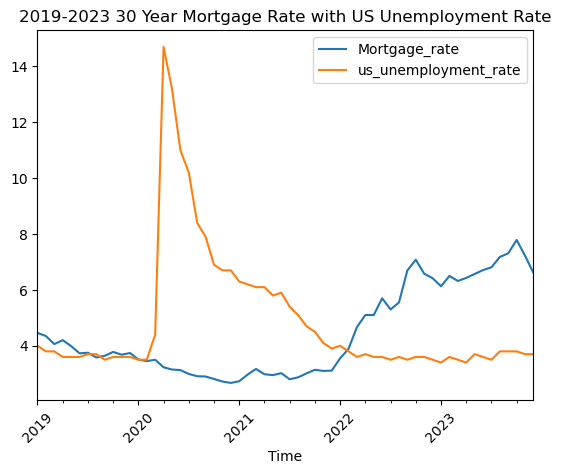

In [10]:
#Plot mortgage rate and us unemployment rates behavior within time line
ax3=mortgage_cpi_unemployment_portfolio.plot(
    rot=45,
    xlabel='Time',
    y=['Mortgage_rate', 'us_unemployment_rate'],
    title='2019-2023 30 Year Mortgage Rate with US Unemployment Rate'
)
fig7 = ax3.get_figure()
fig7.savefig("./Figures/mortgage_unemployment_plot.png")

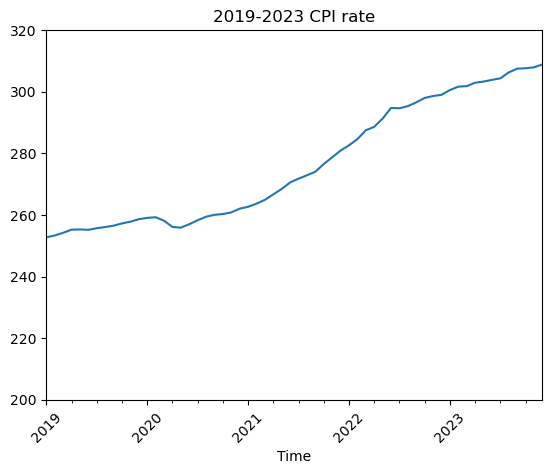

In [11]:
#Plot CPI behavior within time line
ax4=mortgage_cpi_unemployment_portfolio['CPI'].plot(
    rot=45,
    xlabel='Time',
    ylim=[200,320],
    title='2019-2023 CPI rate'
)
fig8 = ax4.get_figure()
fig8.savefig("./Figures/cpi_plot.png")

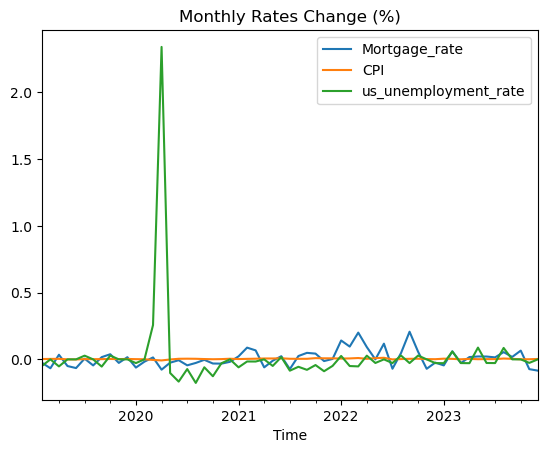

In [12]:
#Calculate and Plot the monthly rates change
rate_chg=mortgage_cpi_unemployment_portfolio.pct_change()
rate_chg=rate_chg.dropna()
ax5=rate_chg.plot(
    xlabel='Time',
    title='Monthly Rates Change (%)'
)
fig9 = ax5.get_figure()
fig9.savefig("./Figures/monthly_rates_change_plot.png")

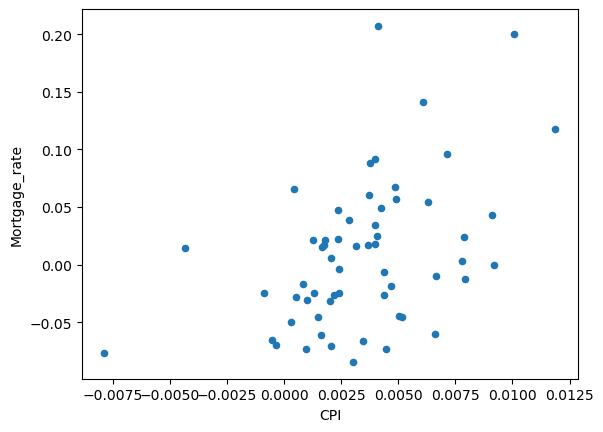

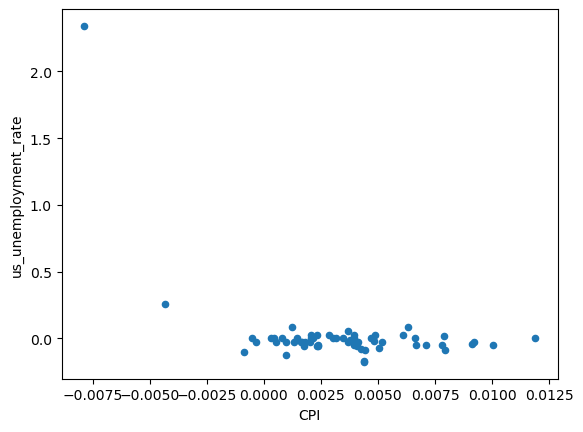

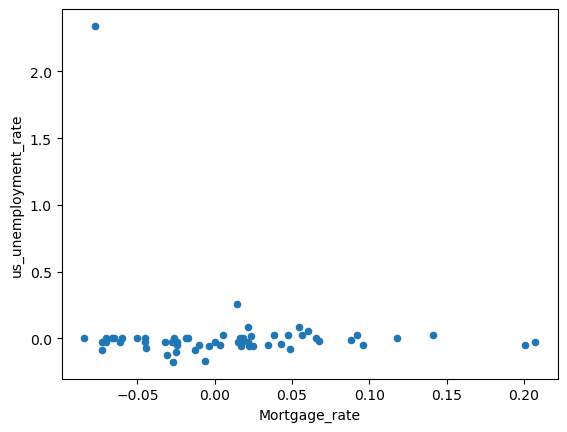

In [14]:
#Plot the relationship between interest rates monthly change and inflation forward rate monthly change 
rx4=rate_chg.plot(kind='scatter',x='CPI', y='Mortgage_rate')
rx5=rate_chg.plot(kind='scatter', x='CPI', y='us_unemployment_rate')
rx6=rate_chg.plot(kind='scatter', x='Mortgage_rate', y='us_unemployment_rate')
fig10 = rx4.get_figure()
fig11 = rx5.get_figure()
fig12 = rx6.get_figure()
fig10.savefig("./Figures/mortgage_cpi_plot.png")
fig11.savefig("./Figures/unemployment_cpi_plot.png")
fig12.savefig("./Figures/unemployment_mortgage_plot.png")

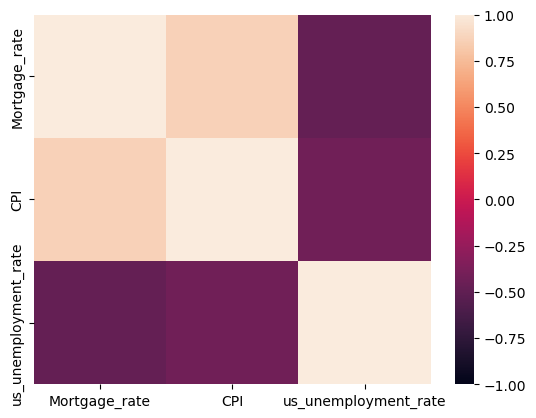

In [15]:
#Calculate the correlation between mortgage rate, cpi and unemployment rate
rate_correlation=mortgage_cpi_unemployment_portfolio.corr()
h2=sns.heatmap(rate_correlation, vmin=-1, vmax=1)
fig13 = h2.get_figure()
fig13.savefig("./Figures/mortgage_cpi_unemployment_heatmap.png")

In [ ]:
#Q: How does US banks index price look like?

In [17]:
indexname = 'BNKS.L'
start_date = "2019-01-01"
end_date = "2023-12-31"
def readstockprice(name,start_date,end_date):
    output_name = name+'_Price.csv'
    stock_price = yf.download(name, start=start_date, end=end_date)
    stock_price.to_csv('./Resources/'+output_name)
    return stock_price
ISHARE=readstockprice(indexname,start_date,end_date)

[*********************100%%**********************]  1 of 1 completed


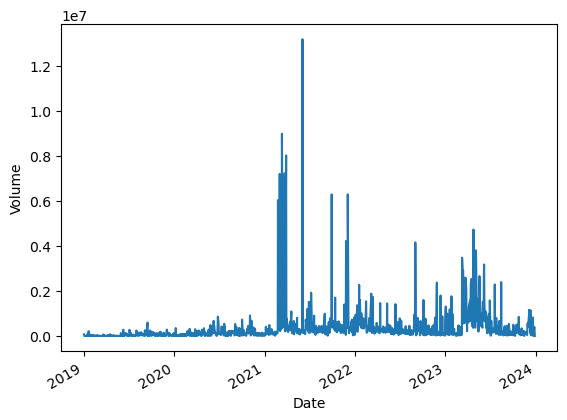

In [18]:
f1=ISHARE['Volume'].plot(ylabel='Volume')
fig14 = f1.get_figure()
fig14.savefig("./Figures/index_trade_volumn_plot.png")

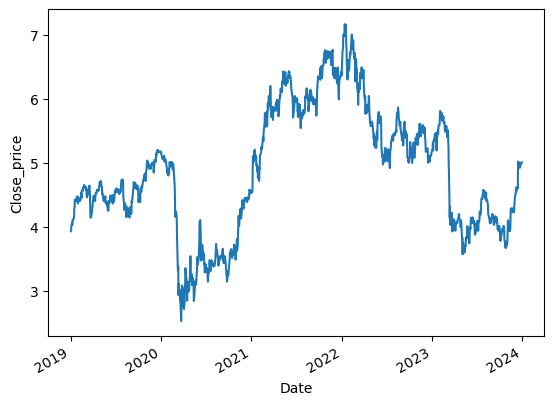

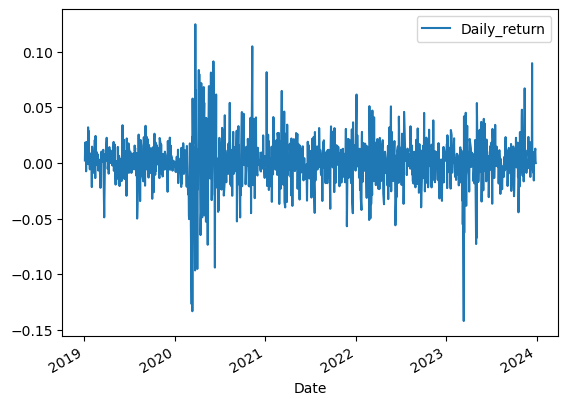

In [19]:
ishare_df=ISHARE[['Close']]
ishare_daily_returns=ishare_df.pct_change()
ishare_daily_returns = ishare_daily_returns.dropna()
ishare_daily_returns.rename(columns={'Close': 'Daily_return'}, inplace=True)
f2=ishare_df['Close'].plot(ylabel='Close_price')
f3=ishare_daily_returns.plot()
fig15 = f2.get_figure()
fig16 = f3.get_figure()
fig15.savefig("./Figures/index_price_plot.png")
fig16.savefig("./Figures/index_daily_return_plot.png")

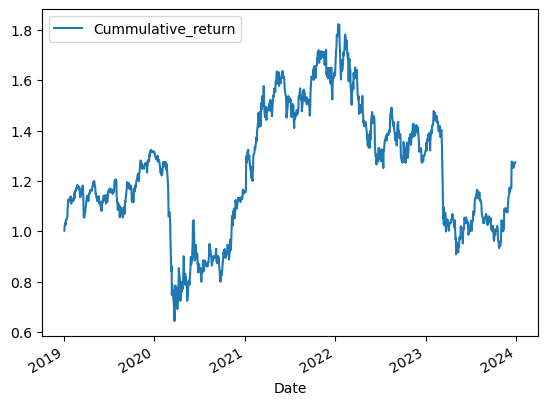

In [20]:
ishare_cumulative_returns = (1 + ishare_daily_returns).cumprod()
ishare_cumulative_returns.rename(columns={'Daily_return': 'Cummulative_return'}, inplace=True)
f4=ishare_cumulative_returns.plot()
fig17 = f4.get_figure()
fig17.savefig("./Figures/index_cummulative_return_plot.png")

In [22]:
index_interest_inflation_portfolio = pd.concat([ishare_df,ishare_cumulative_returns,interest_inflation_portfolio],axis=1, join='inner')
index_interest_inflation_portfolio

,Close,Cummulative_return,Treasury_10_year,Fed_funds,Inflation
2019-01-03,3.94250,1.002161,2.56,2.40,1.87
2019-01-04,4.01425,1.020399,2.67,2.40,1.94
2019-01-07,4.06450,1.033172,2.70,2.40,1.95
2019-01-08,4.03375,1.025356,2.73,2.40,1.98
2019-01-09,4.10950,1.044611,2.74,2.40,1.98
...,...,...,...,...,...
2023-12-21,4.92450,1.251779,3.89,5.33,2.20
2023-12-22,4.94075,1.255910,3.90,5.33,2.22
2023-12-27,5.00400,1.271988,3.79,5.33,2.18
2023-12-28,5.01300,1.274276,3.84,5.33,2.21


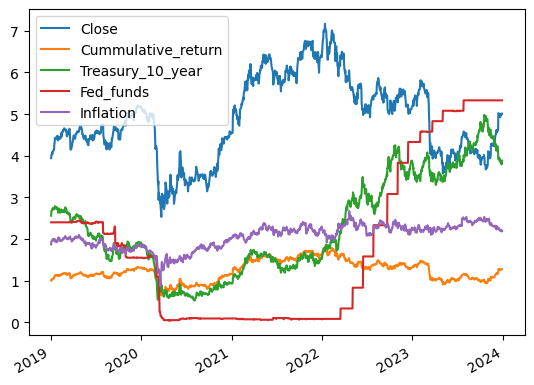

In [23]:
f5=index_interest_inflation_portfolio.plot()
fig18 = f5.get_figure()
fig18.savefig("./Figures/index_interests_inflation_plot.png")

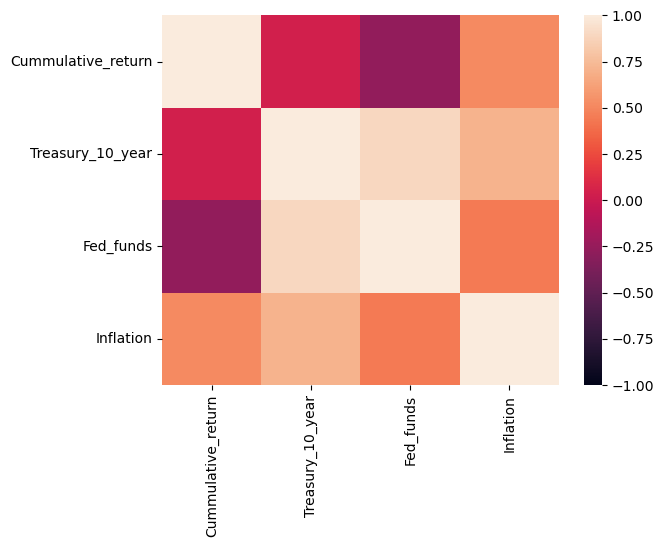

In [24]:
ind_interest_inflation_portfolio = pd.concat([ishare_cumulative_returns,interest_inflation_portfolio],axis=1, join='inner')
indintinf_correlation = ind_interest_inflation_portfolio.corr()
h3=sns.heatmap(indintinf_correlation, vmin=-1, vmax=1)
fig19 = h3.get_figure()
fig19.savefig("./Figures/index_interests_inflation_heatmap.png")